# ChatBot
# Step 1: Import required libraries and read the data files.

In [1]:
import pickle
import numpy as np

In [2]:
with open("train_qa.txt", "rb") as fp:
    train_data = pickle.load(fp)

In [3]:
train_data

[(['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.'],
  ['Is', 'Daniel', 'in', 'the', 'bathroom', '?'],
  'no'),
 (['Mary',
   'moved',
   'to',
   'the',
   'bathroom',
   '.',
   'Sandra',
   'journeyed',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'went',
   'back',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'hallway',
   '.',
   'Sandra',
   'went',
   'to',
   'the',
   'kitchen',
   '.',
   'Daniel',
   'went',
   'back',
   'to',
   'the',
   'bathroom',
   '.'],
  ['Is', 'Daniel', 'in', 'the', '

In [5]:
with open("test_qa.txt", "rb") as fp:
    test_data = pickle.load(fp)

In [6]:
" ".join(train_data[0][2])

'n o'

In [7]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


# Step 2: Data Exploration

In [8]:
len(test_data)

1000

In [9]:
len(train_data)

10000

# Step 3: Setting up vocabulary of all words.

In [10]:
vocal = set()
all_data =train_data +test_data 

In [11]:
for story,question,ans in all_data :
    vocal = vocal.union(set(story))
    vocal = vocal.union(set(question))

In [12]:
vocal.add("yes")
vocal.add("no")

In [13]:
vocal

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [14]:
len(vocal)

37

In [15]:
vocal_len = len(vocal)+1

In [16]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [17]:
max_ques_len = max([len(data[1]) for data in all_data])
max_ques_len

6

In [18]:
#pip install keras ==2.8.0
#pip install tensarflow ==2.8.0
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [19]:
tokenizer = Tokenizer(filters =[])
tokenizer.fit_on_texts(vocal)

In [20]:
tokenizer.word_index

{'bathroom': 1,
 'took': 2,
 'kitchen': 3,
 'mary': 4,
 'picked': 5,
 'daniel': 6,
 'no': 7,
 'down': 8,
 'milk': 9,
 'bedroom': 10,
 'journeyed': 11,
 'office': 12,
 'put': 13,
 'discarded': 14,
 'john': 15,
 'football': 16,
 'dropped': 17,
 'up': 18,
 'garden': 19,
 'hallway': 20,
 'back': 21,
 'travelled': 22,
 '.': 23,
 'yes': 24,
 'to': 25,
 'in': 26,
 'grabbed': 27,
 'apple': 28,
 'went': 29,
 '?': 30,
 'the': 31,
 'moved': 32,
 'sandra': 33,
 'is': 34,
 'left': 35,
 'got': 36,
 'there': 37}

In [21]:
train_story_text = []
train_ques_text = []
train_ans_text = []

for story, question, ans in train_data:
    train_story_text.append(story)
    train_ques_text.append(question)  
    train_ans_text.append(ans)


In [22]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)
train_story_seq 

[[4, 32, 25, 31, 1, 23, 33, 11, 25, 31, 10, 23],
 [4,
  32,
  25,
  31,
  1,
  23,
  33,
  11,
  25,
  31,
  10,
  23,
  4,
  29,
  21,
  25,
  31,
  10,
  23,
  6,
  29,
  21,
  25,
  31,
  20,
  23],
 [4,
  32,
  25,
  31,
  1,
  23,
  33,
  11,
  25,
  31,
  10,
  23,
  4,
  29,
  21,
  25,
  31,
  10,
  23,
  6,
  29,
  21,
  25,
  31,
  20,
  23,
  33,
  29,
  25,
  31,
  3,
  23,
  6,
  29,
  21,
  25,
  31,
  1,
  23],
 [4,
  32,
  25,
  31,
  1,
  23,
  33,
  11,
  25,
  31,
  10,
  23,
  4,
  29,
  21,
  25,
  31,
  10,
  23,
  6,
  29,
  21,
  25,
  31,
  20,
  23,
  33,
  29,
  25,
  31,
  3,
  23,
  6,
  29,
  21,
  25,
  31,
  1,
  23,
  6,
  5,
  18,
  31,
  16,
  37,
  23,
  6,
  29,
  25,
  31,
  10,
  23],
 [4,
  32,
  25,
  31,
  1,
  23,
  33,
  11,
  25,
  31,
  10,
  23,
  4,
  29,
  21,
  25,
  31,
  10,
  23,
  6,
  29,
  21,
  25,
  31,
  20,
  23,
  33,
  29,
  25,
  31,
  3,
  23,
  6,
  29,
  21,
  25,
  31,
  1,
  23,
  6,
  5,
  18,
  31,
  16,
  37,
  23,


In [23]:
len(train_story_text)

10000

In [24]:
len(train_story_seq)

10000

In [25]:
train_story_seq

[[4, 32, 25, 31, 1, 23, 33, 11, 25, 31, 10, 23],
 [4,
  32,
  25,
  31,
  1,
  23,
  33,
  11,
  25,
  31,
  10,
  23,
  4,
  29,
  21,
  25,
  31,
  10,
  23,
  6,
  29,
  21,
  25,
  31,
  20,
  23],
 [4,
  32,
  25,
  31,
  1,
  23,
  33,
  11,
  25,
  31,
  10,
  23,
  4,
  29,
  21,
  25,
  31,
  10,
  23,
  6,
  29,
  21,
  25,
  31,
  20,
  23,
  33,
  29,
  25,
  31,
  3,
  23,
  6,
  29,
  21,
  25,
  31,
  1,
  23],
 [4,
  32,
  25,
  31,
  1,
  23,
  33,
  11,
  25,
  31,
  10,
  23,
  4,
  29,
  21,
  25,
  31,
  10,
  23,
  6,
  29,
  21,
  25,
  31,
  20,
  23,
  33,
  29,
  25,
  31,
  3,
  23,
  6,
  29,
  21,
  25,
  31,
  1,
  23,
  6,
  5,
  18,
  31,
  16,
  37,
  23,
  6,
  29,
  25,
  31,
  10,
  23],
 [4,
  32,
  25,
  31,
  1,
  23,
  33,
  11,
  25,
  31,
  10,
  23,
  4,
  29,
  21,
  25,
  31,
  10,
  23,
  6,
  29,
  21,
  25,
  31,
  20,
  23,
  33,
  29,
  25,
  31,
  3,
  23,
  6,
  29,
  21,
  25,
  31,
  1,
  23,
  6,
  5,
  18,
  31,
  16,
  37,
  23,


In [26]:
train_story_text

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

# Step 4: Vectorizing the data

In [27]:
def vectorize_stories(data, word_index=tokenizer.word_index, 
                     max_story_len=max_story_len,max_ques_len=max_ques_len ):
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    for story, query, answer in data:
        
        # Convert words to their corresponding indices in the word_index
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        
        # Create a one-hot encoded vector for the correct answer
        y = np.zeros(len(word_index) + 1)
        y[word_index[answer]] = 1
        
        # Append to respective lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Pad sequences to a common length
    return (
        pad_sequences(X, maxlen=max_story_len),
        pad_sequences(Xq, maxlen=max_ques_len),
        np.array(Y)
    )

In [28]:
inputs_train ,queries_train,answers_train =  vectorize_stories(train_data)

In [29]:
inputs_test ,queries_test,answers_test =  vectorize_stories(test_data)

In [30]:
queries_test

array([[34, 15, 26, 31,  3, 30],
       [34, 15, 26, 31,  3, 30],
       [34, 15, 26, 31, 19, 30],
       ...,
       [34,  4, 26, 31, 10, 30],
       [34, 33, 26, 31, 19, 30],
       [34,  4, 26, 31, 19, 30]])

In [31]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [32]:
queries_train

array([[34, 33, 26, 31, 20, 30],
       [34,  6, 26, 31,  1, 30],
       [34,  6, 26, 31, 12, 30],
       ...,
       [34, 33, 26, 31, 20, 30],
       [34,  4, 26, 31,  3, 30],
       [34,  4, 26, 31, 10, 30]])

In [33]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
inputs_train

array([[ 0,  0,  0, ..., 31, 10, 23],
       [ 0,  0,  0, ..., 31, 20, 23],
       [ 0,  0,  0, ..., 31,  1, 23],
       ...,
       [ 0,  0,  0, ..., 31, 10, 23],
       [ 0,  0,  0, ...,  9, 37, 23],
       [ 0,  0,  0, ..., 28, 37, 23]])

In [35]:
inputs_test 

array([[ 0,  0,  0, ..., 31, 10, 23],
       [ 0,  0,  0, ..., 31, 19, 23],
       [ 0,  0,  0, ..., 31, 19, 23],
       ...,
       [ 0,  0,  0, ..., 31, 28, 23],
       [ 0,  0,  0, ..., 31, 19, 23],
       [ 0,  0,  0, ..., 28, 37, 23]])

In [36]:
tokenizer.word_index["yes"]

24

In [37]:
tokenizer.word_index["no"]

7

# Step 5: Creating the model

In [38]:
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import Add, Dot, Concatenate
from keras.layers import LSTM

# Define input shapes
input_sequence = Input(shape=(max_story_len,))
question = Input(shape=(max_ques_len,))

# Define input_encoder_n
input_encoder_n = Sequential()
input_encoder_n.add(Embedding(input_dim=vocal_len, output_dim=64))
input_encoder_n.add(Dropout(0.3))

# Define input_encoder_c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocal_len, output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

# Define question_encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocal_len, output_dim=64, input_length=max_ques_len))
question_encoder.add(Dropout(0.3))

# Apply encoders to inputs
input_encoded_n = input_encoder_n(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

# Calculate the match between input_encoded_n and question_encoded
match = Dot(axes=(2, 2))([input_encoded_n, question_encoded])
match = Activation('softmax')(match)

# Calculate response by adding match and input_encoded_c
response = Add()([match, input_encoded_c])
response = Permute((2, 1))(response)

# Concatenate response and question_encoded
answer = Concatenate(axis=-1)([response, question_encoded])

# Define further layers (e.g., LSTM, Dense) as needed
answer = LSTM(32)(answer)
answer = Dropout(0.5)(answer)
answer = Dense(vocal_len, activation='softmax')(answer)

# Create the model
chatbot_model = Model(inputs=[input_sequence, question], outputs=answer)

# Compile the model
chatbot_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
chatbot_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 156)]        0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 sequential (Sequential)        (None, None, 64)     2432        ['input_1[0][0]']                
                                                                                                  
 sequential_2 (Sequential)      (None, 6, 64)        2432        ['input_2[0][0]']                
                                                                                              

In [39]:
history = chatbot_model.fit(
    [inputs_train, queries_train],
    answers_train,
    batch_size=32,
    epochs=20,
    validation_data=([inputs_test, queries_test], answers_test)
)

Epoch 1/20
313/313 [==============================] - 7s 15ms/step - loss: 0.9957 - accuracy: 0.4909 - val_loss: 0.7013 - val_accuracy: 0.5030
Epoch 2/20
313/313 [==============================] - 4s 13ms/step - loss: 0.7205 - accuracy: 0.5070 - val_loss: 0.6951 - val_accuracy: 0.5030
Epoch 3/20
313/313 [==============================] - 5s 16ms/step - loss: 0.7060 - accuracy: 0.5025 - val_loss: 0.6958 - val_accuracy: 0.5030
Epoch 4/20
313/313 [==============================] - 5s 17ms/step - loss: 0.7002 - accuracy: 0.4973 - val_loss: 0.6936 - val_accuracy: 0.5050
Epoch 5/20
313/313 [==============================] - 5s 15ms/step - loss: 0.6985 - accuracy: 0.4990 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 6/20
313/313 [==============================] - 4s 14ms/step - loss: 0.6971 - accuracy: 0.4979 - val_loss: 0.6969 - val_accuracy: 0.4970
Epoch 7/20
313/313 [==============================] - 5s 16ms/step - loss: 0.6968 - accuracy: 0.4980 - val_loss: 0.6973 - val_accuracy: 0.4970

# Step 6: Evaluating the Model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


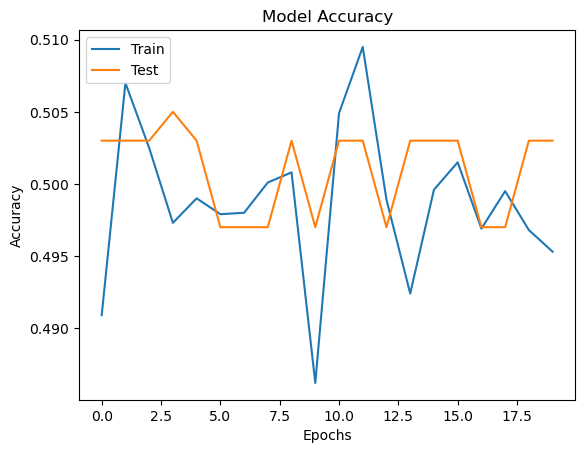

In [40]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [41]:
chatbot_model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model\assets


INFO:tensorflow:Assets written to: chatbot_model\assets


In [42]:
chatbot_model.load_weights("chatbot_model")

# Step 7: Test Results

In [43]:
pred_results = chatbot_model.predict([inputs_test, queries_test])

In [44]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [45]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [46]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [47]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [48]:
val_max = np.argmax(pred_results[0])

In [49]:
for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [50]:
print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.51080245
